### Bitcoin Transaction Latency Prediction Dataset

### Major objective: Find out the factors which causes latency in Bitcoin Transcation

### Importing libraries

In [45]:
import numpy as np 
import pandas as pd
import warnings 
warnings.filterwarnings('ignore') 
from sklearn import linear_model
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Reading csv files

In [46]:
data = pd.read_csv('/Users/mrbinit/Downloads/processed_final_2.csv')

### Understanding data

In [47]:
data.shape

(26031688, 19)

In [48]:
data.head(20)

,Unnamed: 0,DescendantCount,DescendantFee,DescendantSize,EntryBlock,ExitTime,EntryTime,TxSize,TxFee,TxFeePkb,TxIn,TxOut,ExitBlock,BlocksToConfirm,PPF,SecSinceLB,Offset,CountOnEntryTime,BtcPrice
0,0,0,0,111,659878,1607047969,1607047878,193,18886,97.854922,1,1,659879,1,0.003545,0.0,597253,941.0,19378.0
1,161,0,0,0,659878,1607047969,1607047881,224,18387,82.084821,1,2,659879,1,0.006719,3.0,689593,1045.0,19378.0
2,162,0,0,0,659878,1607047969,1607047881,225,18306,81.360000,1,2,659879,1,0.001750,3.0,689818,1046.0,19378.0
3,163,0,0,0,659878,1607047969,1607047881,192,14475,75.390625,1,1,659879,1,0.015290,3.0,692069,1054.0,19378.0
4,164,0,0,0,659878,1607047969,1607047881,224,2034,9.080357,1,2,659879,1,0.000768,3.0,817058,1159.0,19378.0
5,165,0,0,170,659878,1607047969,1607047882,251,7824,31.171315,1,2,659879,1,0.060510,4.0,709439,1088.0,19378.0
6,166,1,62020,482,659878,1607047969,1607047883,226,31780,140.619469,1,2,659879,1,0.000017,5.0,634550,962.0,19378.0
7,167,0,0,256,659878,1607047969,1607047883,446,32895,73.755605,1,4,659879,1,0.000270,5.0,652178,976.0,19378.0
8,168,0,0,0,659878,1607047969,1607047883,225,14916,66.293333,1,2,659879,1,0.000172,5.0,695215,1065.0,19378.0
9,169,0,0,181,659878,1607047969,1607047883,346,21077,60.916185,1,2,659879,1,0.000703,5.0,677168,1007.0,19378.0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26031688 entries, 0 to 26031687
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   DescendantCount   int64  
 2   DescendantFee     int64  
 3   DescendantSize    int64  
 4   EntryBlock        int64  
 5   ExitTime          int64  
 6   EntryTime         int64  
 7   TxSize            int64  
 8   TxFee             int64  
 9   TxFeePkb          float64
 10  TxIn              int64  
 11  TxOut             int64  
 12  ExitBlock         int64  
 13  BlocksToConfirm   int64  
 14  PPF               float64
 15  SecSinceLB        float64
 16  Offset            int64  
 17  CountOnEntryTime  float64
 18  BtcPrice          float64
dtypes: float64(5), int64(14)
memory usage: 3.7 GB


In [50]:
data.head(10)

,Unnamed: 0,DescendantCount,DescendantFee,DescendantSize,EntryBlock,ExitTime,EntryTime,TxSize,TxFee,TxFeePkb,TxIn,TxOut,ExitBlock,BlocksToConfirm,PPF,SecSinceLB,Offset,CountOnEntryTime,BtcPrice
0,0,0,0,111,659878,1607047969,1607047878,193,18886,97.854922,1,1,659879,1,0.003545,0.0,597253,941.0,19378.0
1,161,0,0,0,659878,1607047969,1607047881,224,18387,82.084821,1,2,659879,1,0.006719,3.0,689593,1045.0,19378.0
2,162,0,0,0,659878,1607047969,1607047881,225,18306,81.360000,1,2,659879,1,0.001750,3.0,689818,1046.0,19378.0
3,163,0,0,0,659878,1607047969,1607047881,192,14475,75.390625,1,1,659879,1,0.015290,3.0,692069,1054.0,19378.0
4,164,0,0,0,659878,1607047969,1607047881,224,2034,9.080357,1,2,659879,1,0.000768,3.0,817058,1159.0,19378.0
5,165,0,0,170,659878,1607047969,1607047882,251,7824,31.171315,1,2,659879,1,0.060510,4.0,709439,1088.0,19378.0
6,166,1,62020,482,659878,1607047969,1607047883,226,31780,140.619469,1,2,659879,1,0.000017,5.0,634550,962.0,19378.0
7,167,0,0,256,659878,1607047969,1607047883,446,32895,73.755605,1,4,659879,1,0.000270,5.0,652178,976.0,19378.0
8,168,0,0,0,659878,1607047969,1607047883,225,14916,66.293333,1,2,659879,1,0.000172,5.0,695215,1065.0,19378.0
9,169,0,0,181,659878,1607047969,1607047883,346,21077,60.916185,1,2,659879,1,0.000703,5.0,677168,1007.0,19378.0


### Replacing the column name

In [51]:
original_column_names = data.columns.tolist()

# Set the new name for the first column
new_first_column_name = 'Transcation_id'

# Change the name of the first column
data.rename(columns={data.columns[0]: new_first_column_name}, inplace=True)

# New column names after renaming
new_column_names = data.columns.tolist()

# Display the changes
print("Original Column Names:", original_column_names)
print("New Column Names:", new_column_names)

Original Column Names: ['Unnamed: 0', 'DescendantCount', 'DescendantFee', 'DescendantSize', 'EntryBlock', 'ExitTime', 'EntryTime', 'TxSize', 'TxFee', 'TxFeePkb', 'TxIn', 'TxOut', 'ExitBlock', 'BlocksToConfirm', 'PPF', 'SecSinceLB', 'Offset', 'CountOnEntryTime', 'BtcPrice']
New Column Names: ['Transcation_id', 'DescendantCount', 'DescendantFee', 'DescendantSize', 'EntryBlock', 'ExitTime', 'EntryTime', 'TxSize', 'TxFee', 'TxFeePkb', 'TxIn', 'TxOut', 'ExitBlock', 'BlocksToConfirm', 'PPF', 'SecSinceLB', 'Offset', 'CountOnEntryTime', 'BtcPrice']


### Creating a sample data from the original data

In [52]:
sample_size = 1000
sampled_df = data.sample(n = sample_size, random_state = 100)
sampled_df.shape

(1000, 19)

### Creating new column with the transcation latency

In [53]:
sampled_df['transcation_latency'] = sampled_df['ExitTime'] - sampled_df['EntryTime']
data

,Transcation_id,DescendantCount,DescendantFee,DescendantSize,EntryBlock,ExitTime,EntryTime,TxSize,TxFee,TxFeePkb,TxIn,TxOut,ExitBlock,BlocksToConfirm,PPF,SecSinceLB,Offset,CountOnEntryTime,BtcPrice
0,0,0,0,111,659878,1607047969,1607047878,193,18886,97.854922,1,1,659879,1,0.003545,0.0,597253,941.0,19378.0
1,161,0,0,0,659878,1607047969,1607047881,224,18387,82.084821,1,2,659879,1,0.006719,3.0,689593,1045.0,19378.0
2,162,0,0,0,659878,1607047969,1607047881,225,18306,81.360000,1,2,659879,1,0.001750,3.0,689818,1046.0,19378.0
3,163,0,0,0,659878,1607047969,1607047881,192,14475,75.390625,1,1,659879,1,0.015290,3.0,692069,1054.0,19378.0
4,164,0,0,0,659878,1607047969,1607047881,224,2034,9.080357,1,2,659879,1,0.000768,3.0,817058,1159.0,19378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26031683,26090271,1,10975,450,672223,1614307774,1614297556,224,5575,24.888393,1,2,672239,16,0.025855,399.0,2866615,3547.0,46857.0
26031684,26090272,0,0,142,672218,1614307774,1614296524,223,4260,19.103139,1,2,672239,21,0.007549,162.0,7748030,9392.0,47674.0
26031685,26090273,1,20574,891,672220,1614307774,1614296796,373,9024,24.193029,2,2,672239,19,0.160787,38.0,6115802,7205.0,47246.0
26031686,26090267,0,0,0,672224,1614307774,1614297769,224,5575,24.888393,1,2,672239,15,0.037986,94.0,2149544,2823.0,46688.0


### dropping the variables 

In [54]:
sampled_df = sampled_df.drop(['ExitTime', 'EntryTime', 'Transcation_id', 'DescendantCount', 'EntryBlock', 'TxFee', 'ExitBlock', 'BtcPrice', 'CountOnEntryTime'], axis = 1)
sampled_df

,DescendantFee,DescendantSize,TxSize,TxFeePkb,TxIn,TxOut,BlocksToConfirm,PPF,SecSinceLB,Offset,transcation_latency
20942925,46800,330,247,95.311741,1,2,1,0.000008,826.0,47448347,133
2922808,2244,746,521,3.005758,3,2,6,0.002152,911.0,5067135,2246
7601513,13233,671,223,19.780269,1,2,15,0.000167,802.0,74471904,5899
24734559,0,289,371,96.029650,2,2,1,0.004542,62.0,44049285,105
5980172,0,142,223,75.139013,1,2,1,0.006064,0.0,34152110,555
...,...,...,...,...,...,...,...,...,...,...,...
25614079,0,0,225,78.346667,1,2,3,0.002826,719.0,42297192,1411
199767,42215,286,225,94.466667,1,2,1,0.010233,660.0,19475300,154
13041419,0,144,225,83.200000,1,2,1,0.003666,216.0,89085621,648
25685003,0,1250,2054,13.469328,10,10,689,0.051199,618.0,19087075,419664


In [55]:
sampled_df.describe()

,DescendantFee,DescendantSize,TxSize,TxFeePkb,TxIn,TxOut,BlocksToConfirm,PPF,SecSinceLB,Offset,transcation_latency
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.00000,1.000000e+03,1000.000000
mean,1.449318e+04,393.151000,538.609000,71.546332,2.375000,2.537000,10.465000,2.947907e-02,553.48100,3.425981e+07,6087.807000
std,6.545389e+04,1466.334976,2425.230695,65.077290,9.008081,4.922079,45.257652,7.188839e-02,558.20983,2.356227e+07,27284.451705
min,0.000000e+00,0.000000,188.000000,0.507530,1.000000,1.000000,1.000000,6.312145e-07,0.00000,1.009960e+05,8.000000
25%,0.000000e+00,0.000000,223.000000,33.579393,1.000000,1.000000,1.000000,8.757762e-04,148.75000,1.537584e+07,248.500000
50%,0.000000e+00,134.000000,226.000000,66.720430,1.000000,2.000000,1.000000,4.919987e-03,387.50000,2.908602e+07,623.500000
75%,0.000000e+00,256.000000,373.000000,96.007412,2.000000,2.000000,3.000000,2.413867e-02,772.25000,4.924905e+07,1771.750000
max,1.194735e+06,27869.000000,65748.000000,1384.083045,200.000000,62.000000,689.000000,9.057499e-01,4085.00000,1.032356e+08,419664.000000


### Creating a sample data from the original data

In [56]:

# sample_size = 1000
# sampled_df = data.sample(n = sample_size, random_state = 100)
# sampled_df.shape

### Value count of the variable

In [57]:
sampled_df.DescendantFee.value_counts()


DescendantFee
0         853
46800       1
325440      1
6620        1
5876        1
         ... 
59438       1
17920       1
47002       1
61326       1
42215       1
Name: count, Length: 148, dtype: int64

In [58]:
sampled_df.DescendantSize.value_counts()

DescendantSize
0       458
166      34
142      32
144      26
168      25
       ... 
497       1
572       1
309       1
2282      1
1250      1
Name: count, Length: 263, dtype: int64

In [59]:
sampled_df.TxSize.value_counts()

TxSize
225     96
223     95
226     77
224     68
247     33
        ..
902      1
623      1
550      1
235      1
2054     1
Name: count, Length: 236, dtype: int64

In [60]:
sampled_df.TxFeePkb.value_counts()

TxFeePkb
60.266667     3
48.000000     3
7.000000      3
107.000000    2
9.000000      2
             ..
140.241071    1
29.128889     1
79.300000     1
19.488000     1
148.778947    1
Name: count, Length: 962, dtype: int64

In [61]:
sampled_df.TxIn.value_counts()

TxIn
1      740
2      135
3       45
4       24
5       16
6        9
7        4
8        4
10       3
50       2
23       2
30       2
16       2
9        2
44       2
12       1
200      1
47       1
61       1
59       1
19       1
142      1
26       1
Name: count, dtype: int64

In [62]:
sampled_df.TxOut.value_counts()

TxOut
2     644
1     256
3      35
4      16
6       9
5       9
8       6
7       4
9       3
32      2
10      2
34      1
18      1
48      1
51      1
21      1
62      1
41      1
35      1
13      1
52      1
30      1
49      1
29      1
55      1
Name: count, dtype: int64

In [63]:
sampled_df.BlocksToConfirm.value_counts()

BlocksToConfirm
1      599
2      134
3       49
4       37
5       24
      ... 
31       1
80       1
87       1
21       1
689      1
Name: count, Length: 81, dtype: int64

In [86]:
sampled_df.BlocksToConfirm.head()

20942925     1
2922808      6
7601513     15
24734559     1
5980172      1
Name: BlocksToConfirm, dtype: int64

In [64]:
sampled_df.PPF.value_counts()

PPF
0.000008    1
0.000130    1
0.011538    1
0.001547    1
0.069206    1
           ..
0.090061    1
0.004274    1
0.006200    1
0.007727    1
0.359896    1
Name: count, Length: 1000, dtype: int64

In [65]:
sampled_df.SecSinceLB.value_counts()

SecSinceLB
1.0       8
21.0      6
27.0      5
33.0      5
327.0     5
         ..
419.0     1
390.0     1
2176.0    1
385.0     1
216.0     1
Name: count, Length: 683, dtype: int64

In [66]:
sampled_df.Offset.value_counts()

Offset
47448347    1
38661289    1
48795930    1
24779580    1
48636398    1
           ..
36013672    1
39682994    1
45884195    1
13197053    1
21802214    1
Name: count, Length: 1000, dtype: int64

In [67]:
sampled_df.transcation_latency.value_counts()

transcation_latency
126     5
113     5
929     4
161     4
52      4
       ..
2003    1
2277    1
2574    1
2155    1
331     1
Name: count, Length: 783, dtype: int64

### Finding the missing value

In [68]:
missing_value = data.isnull().sum()
print(missing_value)

Transcation_id      0
DescendantCount     0
DescendantFee       0
DescendantSize      0
EntryBlock          0
ExitTime            0
EntryTime           0
TxSize              0
TxFee               0
TxFeePkb            0
TxIn                0
TxOut               0
ExitBlock           0
BlocksToConfirm     0
PPF                 0
SecSinceLB          0
Offset              0
CountOnEntryTime    0
BtcPrice            0
dtype: int64


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26031688 entries, 0 to 26031687
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Transcation_id    int64  
 1   DescendantCount   int64  
 2   DescendantFee     int64  
 3   DescendantSize    int64  
 4   EntryBlock        int64  
 5   ExitTime          int64  
 6   EntryTime         int64  
 7   TxSize            int64  
 8   TxFee             int64  
 9   TxFeePkb          float64
 10  TxIn              int64  
 11  TxOut             int64  
 12  ExitBlock         int64  
 13  BlocksToConfirm   int64  
 14  PPF               float64
 15  SecSinceLB        float64
 16  Offset            int64  
 17  CountOnEntryTime  float64
 18  BtcPrice          float64
dtypes: float64(5), int64(14)
memory usage: 3.7 GB


### Correlation and heatmap


In [70]:
correlation_matrix = data.corr()
correlation_matrix

,Transcation_id,DescendantCount,DescendantFee,DescendantSize,EntryBlock,ExitTime,EntryTime,TxSize,TxFee,TxFeePkb,TxIn,TxOut,ExitBlock,BlocksToConfirm,PPF,SecSinceLB,Offset,CountOnEntryTime,BtcPrice
Transcation_id,1.000000,0.008890,0.035259,0.006705,0.999721,0.999881,0.999693,0.000546,0.034694,0.030946,-0.000741,0.008090,0.999900,0.042082,0.102822,0.017682,0.099291,0.206231,0.928005
DescendantCount,0.008890,1.000000,0.422605,0.253025,0.006997,0.008816,0.007003,-0.000925,-0.002725,-0.005630,-0.011314,0.069189,0.008729,0.095026,-0.088887,0.012731,-0.004200,0.013287,0.004195
DescendantFee,0.035259,0.422605,1.000000,0.439266,0.034417,0.035100,0.034485,0.131858,0.160418,0.010129,0.087916,0.275246,0.034973,0.031532,-0.050344,0.014441,0.023411,0.048816,0.031965
DescendantSize,0.006705,0.253025,0.439266,1.000000,0.005206,0.006652,0.005183,0.766998,0.499763,-0.006681,0.720727,0.271460,0.006643,0.078875,-0.043747,0.001555,-0.003001,0.000174,0.003344
EntryBlock,0.999721,0.006997,0.034417,0.005206,1.000000,0.999763,0.999928,-0.000229,0.034785,0.031124,-0.001545,0.008297,0.999833,0.023133,0.102604,0.017157,0.097606,0.202021,0.925972
ExitTime,0.999881,0.008816,0.035100,0.006652,0.999763,1.000000,0.999827,0.000566,0.034530,0.030779,-0.000720,0.008094,0.999928,0.041244,0.102325,0.017610,0.096880,0.202130,0.925033
EntryTime,0.999693,0.007003,0.034485,0.005183,0.999928,0.999827,1.000000,-0.000211,0.034895,0.031216,-0.001531,0.008318,0.999753,0.022694,0.102561,0.017196,0.096697,0.201219,0.925189
TxSize,0.000546,-0.000925,0.131858,0.766998,-0.000229,0.000566,-0.000211,1.000000,0.633182,-0.005265,0.958395,0.183434,0.000557,0.043024,-0.014351,-0.004418,-0.000635,-0.006584,-0.000363
TxFee,0.034694,-0.002725,0.160418,0.499763,0.034785,0.034530,0.034895,0.633182,1.000000,0.379929,0.638278,0.172774,0.034420,-0.018838,0.002386,0.000664,0.026542,0.041601,0.035668
TxFeePkb,0.030946,-0.005630,0.010129,-0.006681,0.031124,0.030779,0.031216,-0.005265,0.379929,1.000000,-0.005176,0.003846,0.030687,-0.022920,0.022762,0.004529,0.026903,0.044220,0.032189


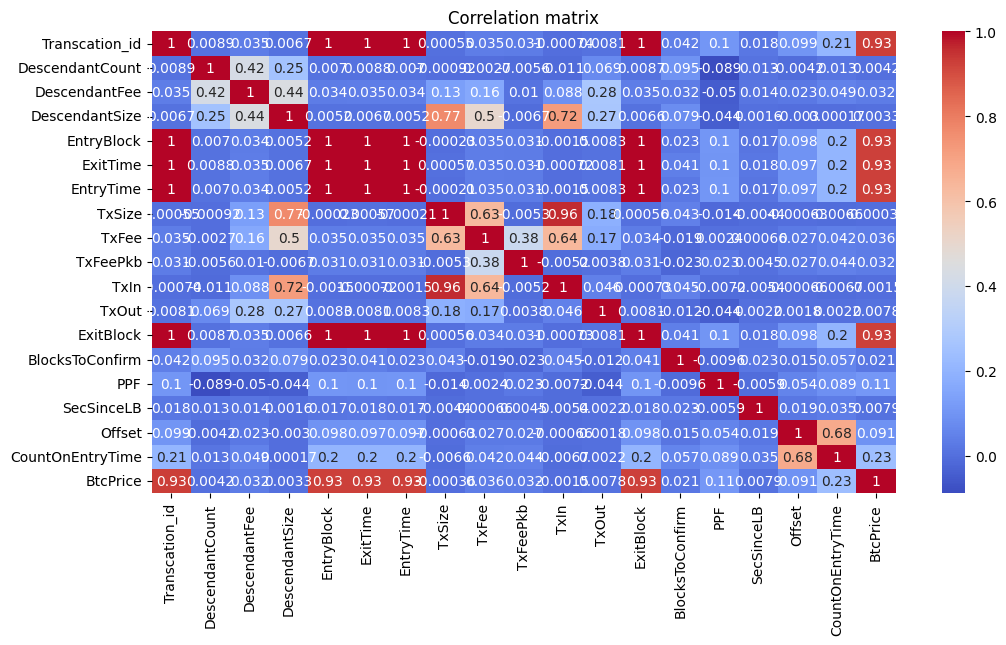

In [71]:
plt.figure(figsize = (12 , 6))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = True)
plt.title('Correlation matrix')
plt.show()

### Data preparation

In [72]:
sampled_df.head(20)

,DescendantFee,DescendantSize,TxSize,TxFeePkb,TxIn,TxOut,BlocksToConfirm,PPF,SecSinceLB,Offset,transcation_latency
20942925,46800,330,247,95.311741,1,2,1,0.000008,826.0,47448347,133
2922808,2244,746,521,3.005758,3,2,6,0.002152,911.0,5067135,2246
7601513,13233,671,223,19.780269,1,2,15,0.000167,802.0,74471904,5899
24734559,0,289,371,96.029650,2,2,1,0.004542,62.0,44049285,105
5980172,0,142,223,75.139013,1,2,1,0.006064,0.0,34152110,555
19235549,0,300,382,117.167539,1,6,1,0.000448,155.0,79209263,399
3797470,0,1635,3490,54.266189,23,2,1,0.002539,2849.0,44538558,237
15505634,0,0,192,326.291667,1,1,1,0.075642,135.0,32638474,155
10578294,0,226,388,51.134021,2,1,1,0.014475,158.0,14683688,307
1368097,0,347,589,5.891341,3,2,34,0.001173,86.0,16646248,24078


### Creating scatterplot


In [73]:
# sns.pairplot(sampled_df)
# plt.show()

### Dividing the data into train and test

In [74]:
data_train, data_test = train_test_split(sampled_df, train_size = 0.7, random_state = 100)
print(data_train.shape)
print(data_test.shape)

(700, 11)
(300, 11)


### Rescaling the numeric variable

In [75]:
scaler = MinMaxScaler()
numeric = ['DescendantFee', 'DescendantSize', 'TxSize', 'TxFeePkb', 'TxIn', 'TxOut', 'BlocksToConfirm', 'PPF', 'SecSinceLB', 'Offset', 'transcation_latency']
data_train[numeric] = scaler.fit_transform(data_train[numeric])
data_train

,DescendantFee,DescendantSize,TxSize,TxFeePkb,TxIn,TxOut,BlocksToConfirm,PPF,SecSinceLB,Offset,transcation_latency
7098697,0.000000,0.000000,0.007185,0.002974,0.017241,0.016393,0.001453,0.004818,0.272758,0.452531,0.000260
7022842,0.000000,0.034521,0.009176,0.066576,0.000000,0.114754,0.000000,0.015217,0.031344,0.464225,0.000393
1450848,0.000000,0.000000,0.001328,0.042769,0.000000,0.016393,0.000000,0.000048,0.029010,0.075211,0.001001
11565936,0.000000,0.000000,0.000078,0.025091,0.000000,0.000000,0.004360,0.094950,0.057019,0.131830,0.005116
11850655,0.000000,0.000000,0.000078,0.061453,0.000000,0.000000,0.001453,0.001827,0.103368,0.544090,0.004782
...,...,...,...,...,...,...,...,...,...,...,...
17826467,0.000000,0.045556,0.029169,0.000345,0.086207,0.000000,0.489826,0.015280,0.394465,0.157021,0.479383
8328547,0.000000,0.021158,0.003983,0.012939,0.000000,0.032787,0.000000,0.029770,0.234411,0.462417,0.000886
9828513,0.059488,0.045353,0.001445,0.057249,0.000000,0.016393,0.002907,0.000040,0.199066,0.153409,0.006939
3643429,0.000000,0.000000,0.007185,0.036665,0.017241,0.016393,0.002907,0.010164,0.165722,0.194219,0.001885


In [76]:
data_train.describe()

,DescendantFee,DescendantSize,TxSize,TxFeePkb,TxIn,TxOut,BlocksToConfirm,PPF,SecSinceLB,Offset,transcation_latency
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.018221,0.029570,0.009721,0.050142,0.015296,0.026159,0.013530,0.034113,0.185614,0.334963,0.014053
std,0.074557,0.079123,0.043110,0.051518,0.064446,0.086973,0.072023,0.081298,0.180314,0.226927,0.070495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.001367,0.022554,0.000000,0.000000,0.000000,0.000976,0.049933,0.150682,0.000586
50%,0.000000,0.011440,0.002245,0.046249,0.000000,0.016393,0.000000,0.005769,0.132044,0.287391,0.001461
75%,0.000000,0.022727,0.007224,0.066689,0.017241,0.016393,0.002907,0.027020,0.266005,0.477694,0.003863
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing the data into two different part x axis and y axis

In [77]:
y_train = data_train.pop('transcation_latency')
x_train = data_train
y_train.head()

7098697     0.000260
7022842     0.000393
1450848     0.001001
11565936    0.005116
11850655    0.004782
Name: transcation_latency, dtype: float64

In [78]:
x_train.head(10)

,DescendantFee,DescendantSize,TxSize,TxFeePkb,TxIn,TxOut,BlocksToConfirm,PPF,SecSinceLB,Offset
7098697,0.000000,0.000000,0.007185,0.002974,0.017241,0.016393,0.001453,0.004818,0.272758,0.452531
7022842,0.000000,0.034521,0.009176,0.066576,0.000000,0.114754,0.000000,0.015217,0.031344,0.464225
1450848,0.000000,0.000000,0.001328,0.042769,0.000000,0.016393,0.000000,0.000048,0.029010,0.075211
11565936,0.000000,0.000000,0.000078,0.025091,0.000000,0.000000,0.004360,0.094950,0.057019,0.131830
11850655,0.000000,0.000000,0.000078,0.061453,0.000000,0.000000,0.001453,0.001827,0.103368,0.544090
15416760,0.000000,0.000000,0.001367,0.019697,0.000000,0.016393,0.000000,0.004865,0.063688,0.409929
15751286,0.000000,0.021259,0.007185,0.035988,0.017241,0.016393,0.000000,0.000211,0.084028,0.129144
242628,0.000000,0.000000,0.007146,0.003655,0.017241,0.016393,0.000000,0.000396,0.029343,0.167999
18092225,0.260253,0.092124,0.014175,0.091822,0.034483,0.032787,0.000000,0.010260,0.000333,0.186080
4271426,0.071926,0.029156,0.001445,0.073503,0.000000,0.016393,0.001453,0.003540,0.114705,0.714877


### Data modeling


In [79]:
# adding constant as statsmodel.api doesnot include constants
x_train_sm = sm.add_constant(x_train)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     transcation_latency   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                 3.303e+04
Date:                 Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                         17:56:30   Log-Likelihood:                 3024.9
No. Observations:                  700   AIC:                            -6028.
Df Residuals:                      689   BIC:                            -5978.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0010      0.000      3.422      0.001       0.000       0.002
DescendantFee       0.0058      0.003      2.136      0.033       0.000       0.011
DescendantSize     -0.0075      0.003     -2.283      0.023      -0.014      -0.001
TxSize              0.0062      0.007      0.877      0.381      -0.008       0.020
TxFeePkb            0.0052      0.002      2.103      0.036       0.000       0.010
TxIn                0.0028      0.004      0.672      0.502      -0.005       0.011
TxOut               0.0014      0.002      0.900      0.368      -0.002       0.004
BlocksToConfirm     0.9787      0.002    563.663      0.000       0.975       0.982
PPF                 0.0021      0.002      1.356      0.175      -0.001       0.005
SecSinceLB         -0.0005      0.001     -0.708      0.479      -0.002       0.001
Offset             -0.0013      0.001     -2.316      0.021      -0.002      -0.000
==============================================================================
Omnibus:                      439.839   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27405.531
Skew:                          -2.051   Prob(JB):                         0.00
Kurtosis:                      33.377   Cond. No.                         70.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
2,TxSize,6.37
1,DescendantSize,5.06
4,TxIn,4.98
0,DescendantFee,2.92
9,Offset,2.07
3,TxFeePkb,1.83
8,SecSinceLB,1.70
5,TxOut,1.28
7,PPF,1.17
6,BlocksToConfirm,1.07


In [81]:
x = x_train.drop('SecSinceLB', axis = 1)

In [82]:
# adding constant as statsmodel.api doesnot include constants
x_train_sm = sm.add_constant(x)
linear_regression = sm.OLS(y_train, x_train_sm)
linear_regression_model = linear_regression.fit()
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     transcation_latency   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                 3.673e+04
Date:                 Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                         17:56:30   Log-Likelihood:                 3024.7
No. Observations:                  700   AIC:                            -6029.
Df Residuals:                      690   BIC:                            -5984.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0009      0.000      3.454      0.001       0.000       0.001
DescendantFee       0.0059      0.003      2.159      0.031       0.001       0.011
DescendantSize     -0.0076      0.003     -2.308      0.021      -0.014      -0.001
TxSize              0.0061      0.007      0.871      0.384      -0.008       0.020
TxFeePkb            0.0051      0.002      2.076      0.038       0.000       0.010
TxIn                0.0028      0.004      0.671      0.503      -0.005       0.011
TxOut               0.0014      0.002      0.915      0.361      -0.002       0.004
BlocksToConfirm     0.9786      0.002    564.619      0.000       0.975       0.982
PPF                 0.0021      0.002      1.382      0.168      -0.001       0.005
Offset             -0.0013      0.001     -2.311      0.021      -0.002      -0.000
==============================================================================
Omnibus:                      437.720   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27123.486
Skew:                          -2.037   Prob(JB):                         0.00
Kurtosis:                      33.222   Cond. No.                         69.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

,variables,VIF
2,TxSize,6.37
1,DescendantSize,5.06
4,TxIn,4.98
0,DescendantFee,2.92
9,Offset,2.07
3,TxFeePkb,1.83
8,SecSinceLB,1.70
5,TxOut,1.28
7,PPF,1.17
6,BlocksToConfirm,1.07


In [84]:
data 

,Transcation_id,DescendantCount,DescendantFee,DescendantSize,EntryBlock,ExitTime,EntryTime,TxSize,TxFee,TxFeePkb,TxIn,TxOut,ExitBlock,BlocksToConfirm,PPF,SecSinceLB,Offset,CountOnEntryTime,BtcPrice
0,0,0,0,111,659878,1607047969,1607047878,193,18886,97.854922,1,1,659879,1,0.003545,0.0,597253,941.0,19378.0
1,161,0,0,0,659878,1607047969,1607047881,224,18387,82.084821,1,2,659879,1,0.006719,3.0,689593,1045.0,19378.0
2,162,0,0,0,659878,1607047969,1607047881,225,18306,81.360000,1,2,659879,1,0.001750,3.0,689818,1046.0,19378.0
3,163,0,0,0,659878,1607047969,1607047881,192,14475,75.390625,1,1,659879,1,0.015290,3.0,692069,1054.0,19378.0
4,164,0,0,0,659878,1607047969,1607047881,224,2034,9.080357,1,2,659879,1,0.000768,3.0,817058,1159.0,19378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26031683,26090271,1,10975,450,672223,1614307774,1614297556,224,5575,24.888393,1,2,672239,16,0.025855,399.0,2866615,3547.0,46857.0
26031684,26090272,0,0,142,672218,1614307774,1614296524,223,4260,19.103139,1,2,672239,21,0.007549,162.0,7748030,9392.0,47674.0
26031685,26090273,1,20574,891,672220,1614307774,1614296796,373,9024,24.193029,2,2,672239,19,0.160787,38.0,6115802,7205.0,47246.0
26031686,26090267,0,0,0,672224,1614307774,1614297769,224,5575,24.888393,1,2,672239,15,0.037986,94.0,2149544,2823.0,46688.0
